In [15]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pycoingecko as pycoin

print('All good!')


All good!


In [16]:
cg = pycoin.CoinGeckoAPI()
cg

In [61]:
raw_data = cg.get_coin_market_chart_by_id(id = 'bitcoin',vs_currency= 'usd',days = 650)
price_data = pd.json_normalize(raw_data,record_path = 'prices')
price_data['clean_date'] = pd.to_datetime(price_data[0], unit='ms')
df = price_data
price_data

,0,1,clean_date
0,1590883200000,9662.705873,2020-05-31 00:00:00
1,1590969600000,9466.961781,2020-06-01 00:00:00
2,1591056000000,10167.930693,2020-06-02 00:00:00
3,1591142400000,9515.243859,2020-06-03 00:00:00
4,1591228800000,9645.227869,2020-06-04 00:00:00
...,...,...,...
646,1646697600000,38076.493823,2022-03-08 00:00:00
647,1646784000000,38732.937013,2022-03-09 00:00:00
648,1646870400000,41986.034446,2022-03-10 00:00:00
649,1646956800000,39468.354773,2022-03-11 00:00:00


In [52]:
del price_data['clean_date']
del price_data[0]
#print(price_data)
scaler = MinMaxScaler(feature_range=(0,1))
close_df = scaler.fit_transform(np.array(price_data).reshape(-1,1))
close_df

array([[1.10710901e-02],
       [7.73092447e-03],
       [1.96922165e-02],
       [8.55480697e-03],
       [1.07728464e-02],
       [1.30077982e-02],
       [1.06318583e-02],
       [1.10736980e-02],
       [1.23662002e-02],
       [1.29536461e-02],
       [1.28508496e-02],
       [1.46919356e-02],
       [5.32550733e-03],
       [7.77480466e-03],
       [7.77378354e-03],
       [5.66617272e-03],
       [7.12954820e-03],
       [8.72003299e-03],
       [7.66948802e-03],
       [6.58432040e-03],
       [5.09997746e-03],
       [5.90996627e-03],
       [4.85392780e-03],
       [1.13437264e-02],
       [1.04222920e-02],
       [4.67818534e-03],
       [4.17659739e-03],
       [2.60362967e-03],
       [0.00000000e+00],
       [2.15001749e-03],
       [2.92238716e-03],
       [2.31756356e-03],
       [3.69890666e-03],
       [1.37215427e-03],
       [9.80826412e-04],
       [2.03065682e-03],
       [1.25422948e-03],
       [5.60500847e-03],
       [4.09066030e-03],
       [7.13728250e-03],


In [53]:
training_size = int(len(close_df)*0.9)
test_size = len(close_df)-training_size
train_data,test_data = close_df[0:training_size,:],close_df[training_size:len(close_df),:1]
print('train_data: ', train_data.shape)
print('test_data: ', test_data.shape)

train_data:  (585, 1)
test_data:  (66, 1)


In [54]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [55]:
time_step = 10 
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [56]:
# reshape input to be [samples, time steps, features] which is required for LSTMX_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (574, 10)
X_test:  (55, 10, 1)


In [57]:
model = Sequential() 
# Adding a LSTM layer with 10 internal units
model.add(LSTM(10,input_shape=(None,1),activation='relu'))
# Adding a Dense layer with 1 units.
model.add(Dense(1))
# Loss function + optimizer
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=10,verbose=1)

Epoch 1/100
58/58 [==============================] - 3s 13ms/step - loss: 0.2436 - val_loss: 0.1623
Epoch 2/100
58/58 [==============================] - 0s 6ms/step - loss: 0.1145 - val_loss: 0.0136
Epoch 3/100
58/58 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.0016
Epoch 4/100
58/58 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 5/100
58/58 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/100
58/58 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/100
58/58 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 8/100
58/58 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/100
58/58 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/100
58/58 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 11

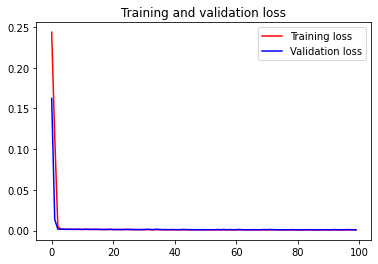

<Figure size 432x288 with 0 Axes>

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [63]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

look_back=time_step
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_df)-1, :] = test_predict

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': price_data['clean_date'],
                    'original_close': price_data[1],
                    'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                    'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})


fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],plotdf['test_predicted_close']],
                labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original vs predicted close price',
                plot_bgcolor='white',legend_title_text='Close Price')                               

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()